# SHREYANSHU PANDEY

# CODSOFT TASK2

# IRIS FLOWER CLASSIFICATION

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [4]:
df=pd.read_csv("IRIS.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df['species'], categories = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [36]:
df.shape

(150, 6)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
 5   cluster       150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [38]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster'],
      dtype='object')

In [39]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,0.973333
std,0.828066,0.433594,1.764420,0.763161,0.819232,0.818795
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


In [40]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
cluster         0
dtype: int64

In [41]:
data=df.iloc[:,1:]

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [43]:
#sepallength vs sepalwidth
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

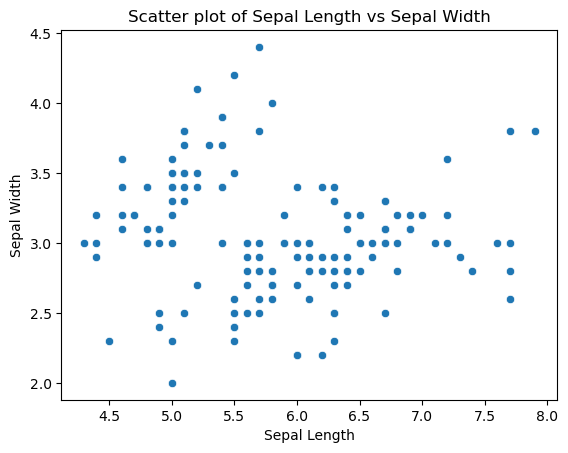

In [44]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df)
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

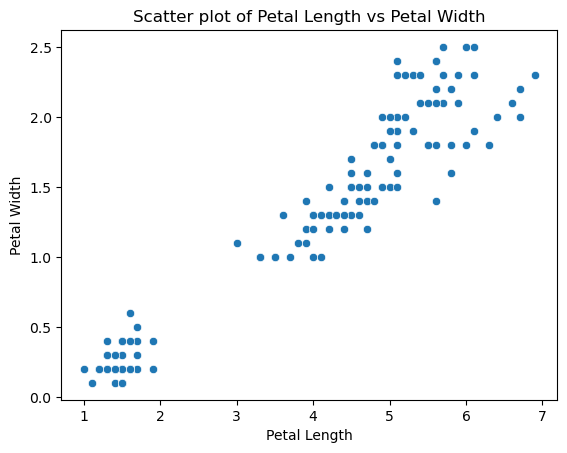

In [45]:
#petal length vs petal width
sns.scatterplot(x='petal_length', y='petal_width', data=df)
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

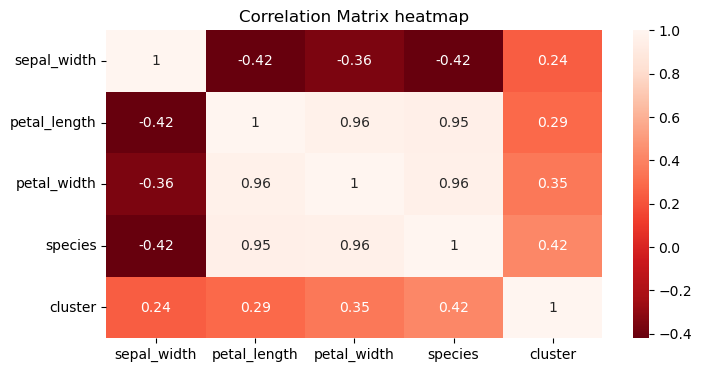

In [46]:
# Correlation Heatmap Visualization Code
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [48]:
# Defining the X and y
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [49]:
# Splitting the data to train and test
x_predict,x_test,y_predict,y_test=train_test_split(x,y, test_size=0.3)

In [50]:
# Checking the train distribution of dependent variable
y_predict.value_counts()

2    37
1    35
0    33
Name: Species, dtype: int64

In [51]:
df['cluster']=y_predict
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,0.0
1,4.9,3.0,1.4,0.2,0,0.0
2,4.7,3.2,1.3,0.2,0,0.0
3,4.6,3.1,1.5,0.2,0,0.0
4,5.0,3.6,1.4,0.2,0,NaN
5,5.4,3.9,1.7,0.4,0,0.0
6,4.6,3.4,1.4,0.3,0,0.0
7,5.0,3.4,1.5,0.2,0,NaN
8,4.4,2.9,1.4,0.2,0,0.0
9,4.9,3.1,1.5,0.1,0,0.0


In [52]:
k_mg=range(1,10)
iris=[]
for k in k_mg:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal_length','petal_width']])
    iris.append(km.inertia_)

C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

In [53]:
iris

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.48238901098901,
 13.933308757908755,
 11.073657664362928,
 9.225957208237984,
 7.833345054945056,
 6.6357809523809514]

In [54]:
km=KMeans(n_clusters=3,random_state=0)
y_predict=km.fit_predict(df[['petal_length','petal_width']])
y_predict

C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
df['cluster']=y_predicted
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


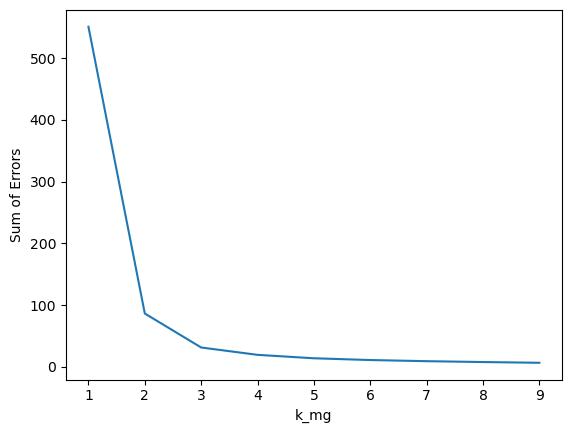

In [56]:
plt.xlabel('k_mg')
plt.ylabel('Sum of Errors')
plt.plot(k_mg, iris)

In [57]:
km = KMeans(n_clusters= 3, random_state = 0)
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\This PC\anaconda3\anaconda.py\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.species, df.cluster)
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]], dtype=int64)

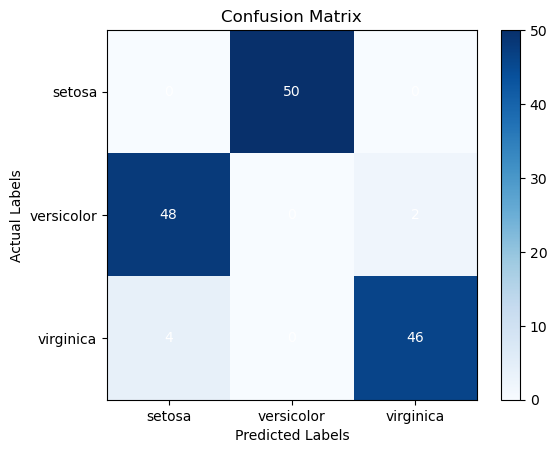

In [60]:
actual_labels= df.species
predicted_labels = df.cluster

cm = confusion_matrix(actual_labels, predicted_labels)
class_labels = ['setosa', 'versicolor', 'virginica']

#plotting confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for i in range (len(class_labels)):
   for j in range(len(class_labels)):
      plt.text(j, i, cm[i, j], ha= 'center', va= 'center', color = 'White')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()


In [61]:
#split dataset into traning and testing sets
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [62]:
x_train,x_test,y_train,y_test

(     sepal_length  sepal_width  petal_length  petal_width
 22            4.6          3.6           1.0          0.2
 15            5.7          4.4           1.5          0.4
 65            6.7          3.1           4.4          1.4
 11            4.8          3.4           1.6          0.2
 42            4.4          3.2           1.3          0.2
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [120 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [64]:
x_train_scaled, x_test_scaled

(array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
        [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
        [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
        [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
        [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
        [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
        [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
        [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
        [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
        [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
        [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
        [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
        [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
        [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
        [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
        [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
        

In [65]:
#create a KNN classifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN

KNeighborsClassifier(n_neighbors=3)

In [66]:
#train the model
KNN.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [67]:
y_predict =KNN.predict(x_test_scaled)

In [69]:
species_name = df['species'].unique().astype(str).tolist()

report = classification_report(y_test, y_predict, target_names = species_name)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

